In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
white_wine=pd.read_csv("winequality-white.csv",sep=";")
red_wine=pd.read_csv("winequality-red.csv",sep=";")

In [3]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Feature Engineering 

In [4]:
#store wine type as an dim
red_wine['wine_type']="red"
white_wine['wine_type']="white"
#combine quality score to respective wines
red_wine['quality_label']=red_wine['quality'].apply(lambda value: 'low'if value<=5 
                                                    else 'medium' if value<=7
                                                    else 'high')
red_wine['quality_label']=pd.Categorical(red_wine['quality_label'],
                                        categories=['low','medium','high'])

white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low' 
                                                              if value <= 5 else 'medium' 
                                                                  if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], 
                                             categories=['low', 'medium', 'high'])

In [5]:

red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [6]:
corrMatrix=red_wine.corr()

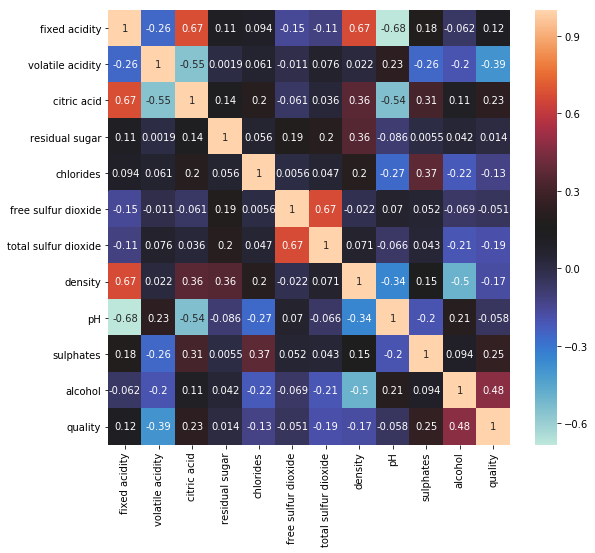

In [7]:
f,ax=plt.subplots(figsize=(9,8))
ax=sns.heatmap(corrMatrix,annot=True,cmap='icefire')

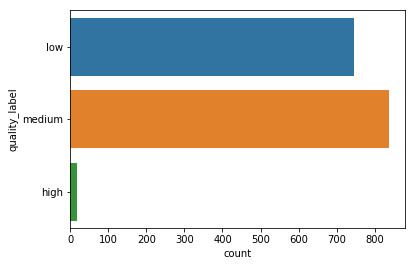

In [8]:
sns.countplot(y='quality_label',data=red_wine)

Text(0.5, 1.0, 'white wine')

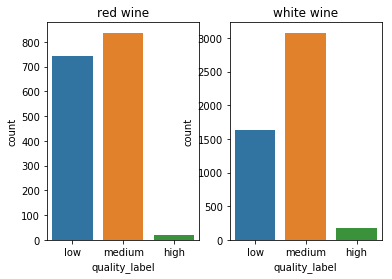

In [9]:
fig,(ax1,ax2)=plt.subplots(ncols=2)
sns.countplot(x='quality_label',data=red_wine,ax=ax1)
sns.countplot(x='quality_label',data=white_wine,ax=ax2)
ax1.set_title("red wine")
ax2.set_title("white wine")

In [10]:
red_wine['quality_label'].value_counts()
#red_wine.groupby(['quality_label']).counts()

medium    837
low       744
high       18
Name: quality_label, dtype: int64

In [11]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
# df1=pd.DataFrame({'cat':list(red_wine['quality_label'])})
# df1.groupby('cat').count()


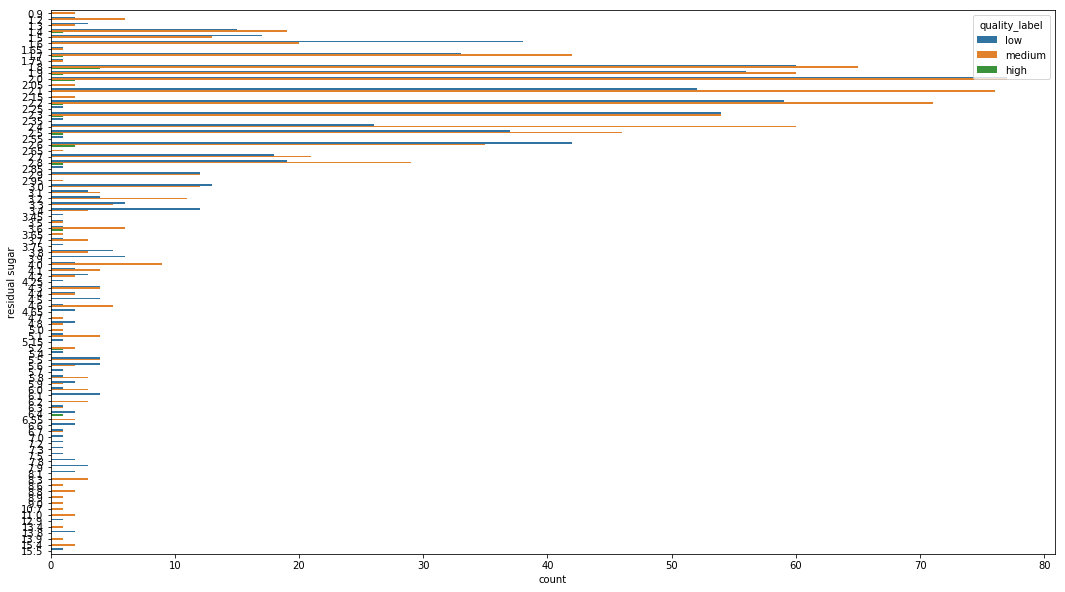

In [13]:
plt.figure(figsize=(18,10))
sns.countplot(y="residual sugar", hue="quality_label", data=red_wine)

## merge two dataset 

In [12]:
wines=pd.concat([red_wine,white_wine])
wines=wines.sample(frac=1,random_state=42).reset_index(drop=True)  #frac=1 means that take 100% values if 0.5 means take 50%
wines.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


Text(0.5,1,'white wine')

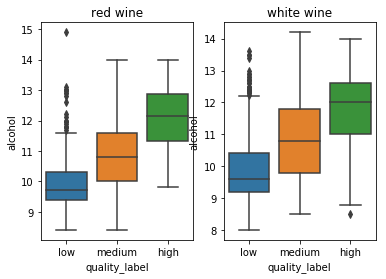

In [15]:
fig,(ax1,ax2)=plt.subplots(ncols=2)
#fig.figsize=(18,18)
sns.boxplot(x="quality_label",y="alcohol",data=red_wine,ax=ax1)
sns.boxplot(x="quality_label",y="alcohol",data=white_wine,ax=ax2)
ax1.set_title("red wine")
ax2.set_title("white wine")


Text(0,0.5,'wine PH')

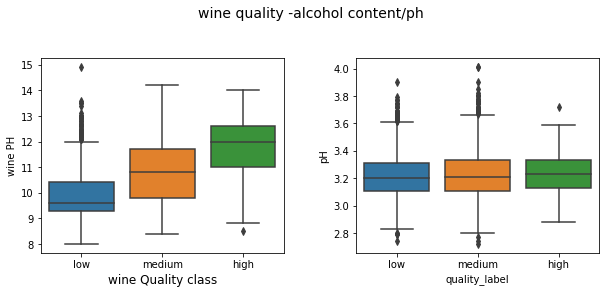

In [16]:
f,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
f.suptitle('wine quality -alcohol content/ph',fontsize=14)
f.subplots_adjust(top=0.80,wspace=0.3)

sns.boxplot(x="quality_label",y="alcohol",
           data=wines,ax=ax1)
ax1.set_xlabel("wine Quality class")
ax1.set_ylabel("wine Alcohol %")

sns.boxplot(x="quality_label",y="pH",
           data=wines,ax=ax2)
ax1.set_xlabel("wine Quality class",size=12)
ax1.set_ylabel("wine PH")

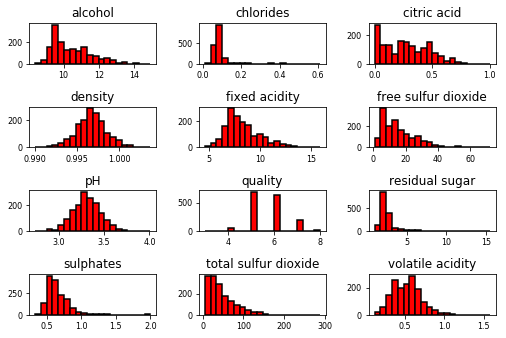

In [17]:
red_wine.hist(bins=20, color='red',edgecolor='black',
             linewidth=1.5,xlabelsize=8,
             ylabelsize=8,grid=False)
plt.tight_layout(rect=(0,0,1.2,1.2))

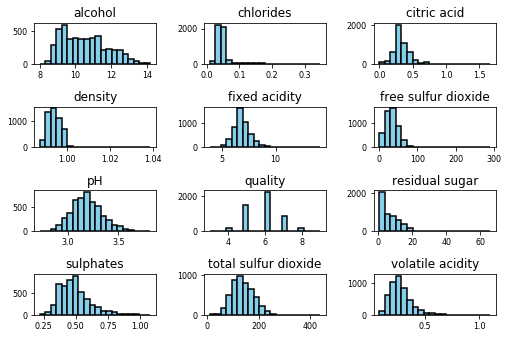

In [18]:
white_wine.hist(bins=20, color='skyblue',edgecolor='black',
             linewidth=1.5,xlabelsize=8,
             ylabelsize=8,grid=False)
plt.tight_layout(rect=(0,0,1.2,1.2))

In [19]:
cols=['wine_type','quality','sulphates','volatile acidity']

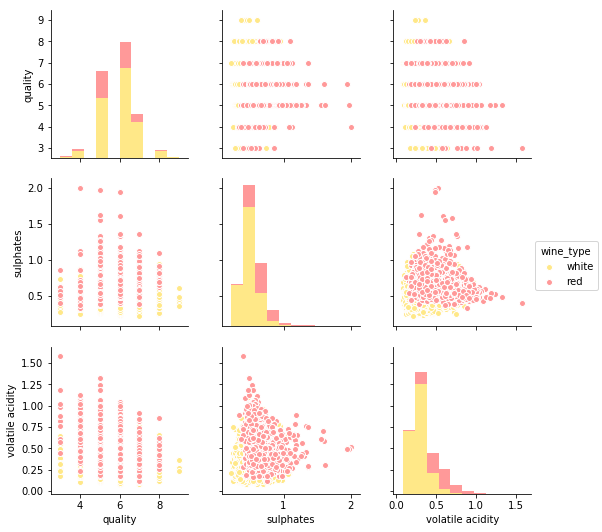

In [20]:
sns.pairplot(wines[cols],hue='wine_type',
            palette={"red":"#FF9999","white":"#FFE888"})

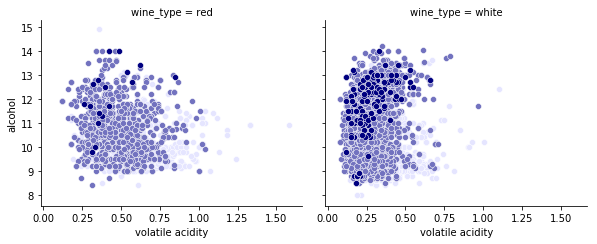

In [21]:
g=sns.FacetGrid(wines,col="wine_type",hue="quality_label",
             col_order=['red','white'],hue_order=['low','medium','high'],
             aspect=1.2,size=3.5,palette=sns.light_palette('navy',3))
g.map(plt.scatter,"volatile acidity","alcohol",edgecolor="white",
     linewidth=0.5)

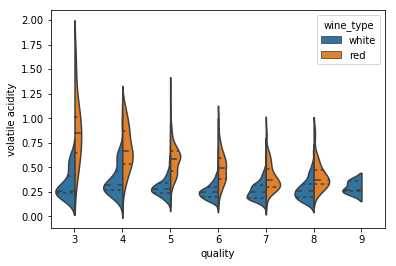

In [25]:
sns.violinplot(x="quality",y="volatile acidity", hue="wine_type",
              data=wines, split=True,inner="quart",linewidth=1.5)

C:\Program Files (x86)\New folder\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


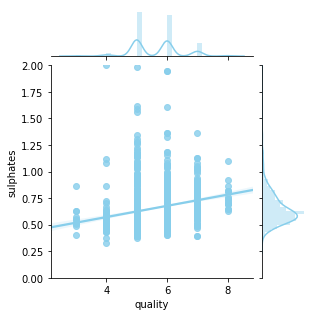

In [14]:
#joint plot
sns.jointplot(x='quality',y='sulphates',data=red_wine,
             kind='reg',ylim=(0,2),color='skyblue',
             size=4.5,ratio=4)

/Users/vishwaprabhakarsingh/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


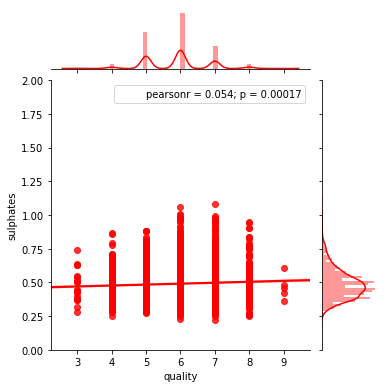

In [34]:
#joint plot
sns.jointplot(x='quality',y='sulphates',data=white_wine,
             kind='reg',ylim=(0,2),color='red',
             size=5.5,ratio=4)

C:\Program Files (x86)\New folder\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


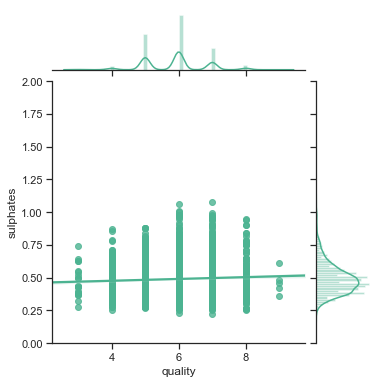

In [15]:
sns.set(style="ticks")

#rs = np.random.RandomState(11)
#x = rs.gamma(2, size=1000)
#y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x='quality',y='sulphates',data=white_wine,
             kind='reg',ylim=(0,2),color="#4CB391",
             size=5.5,ratio=4)